In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('/content/Installed Capacity per Production Type_201501010000-202501010000 (1).csv')

In [14]:
df.columns = [col.replace(' [MW]', '') for col in df.columns]

In [15]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.replace('n/e', '0')

In [17]:
df.fillna(0, inplace=True)

In [18]:
df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:
df

,Production Type,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Biomass,0,170,170,1840,1931,1578,1579,1301,1343,1403
1,Energy storage,0,0,0,0,0,0,0,0,0,0
2,Fossil Brown coal/Lignite,0,0,0,0,0,0,0,0,0,0
3,Fossil Coal-derived gas,0,0,0,0,0,0,0,0,0,0
4,Fossil Gas,6121,6121,6696,11812,11952,12238,12218,13074,12893,13133
5,Fossil Hard coal,4810,2930,2930,3972,3966,1812,1812,1816,1816,1812
6,Fossil Oil,6670,6670,5300,6263,3271,2874,2746,2762,2566,3042
7,Fossil Oil shale,0,0,0,0,0,0,0,0,0,0
8,Fossil Peat,0,0,0,0,0,0,0,0,0,0
9,Geothermal,0,0,0,0,0,0,0,2,2,2


In [40]:
df1 = df.set_index('Production Type').T

In [43]:
df1.reset_index(inplace=True)
df1.columns = ['Year'] + list(df1.columns[1:])

In [47]:
df1 = df1.reset_index()

In [48]:
df1

,index,Year,Biomass,Energy storage,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,...,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore,Total Grand capacity
0,0,2015,0,0,0,0,6121,4810,6670,0,...,8214,240,63130,62,0,6191,0,0,10322,121039
1,1,2016,170,0,0,0,6121,2930,6670,0,...,8204,240,63130,62,0,6772,0,0,11761,121351
2,2,2017,170,0,0,0,6696,2930,5300,0,...,8231,240,63130,62,0,7660,0,0,13569,123280
3,3,2018,1840,0,0,0,11812,3972,6263,0,...,8578,240,63130,175,0,7170,0,0,12518,131940
4,4,2019,1931,0,0,0,11952,3966,3271,0,...,8279,240,63130,108,0,8188,0,0,13610,130653
5,5,2020,1578,0,0,0,12238,1812,2874,0,...,8785,246,63130,1070,0,9438,460,14,16578,134762
6,6,2021,1579,0,0,0,12218,1812,2746,0,...,8785,246,61370,1120,0,10213,460,10,17217,134340
7,7,2022,1301,0,0,0,13074,1816,2762,0,...,8785,243,61370,1157,0,13154,947,20,19516,141031
8,8,2023,1343,0,0,0,12893,1816,2566,0,...,8787,243,61370,1145,0,14639,929,494,20842,143815
9,9,2024,1403,0,0,0,13133,1812,3042,0,...,8787,243,61370,1032,0,17419,968,1483,22134,149491


In [84]:
df1['Total Grand capacity']

,Total Grand capacity
0,121039
1,121351
2,123280
3,131940
4,130653
5,134762
6,134340
7,141031
8,143815
9,149491


In [51]:
df1['Total Grand capacity'] = pd.to_numeric(df1['Total Grand capacity'], errors='coerce')

In [61]:
df1['Year'] = df1['Year'].astype(str)

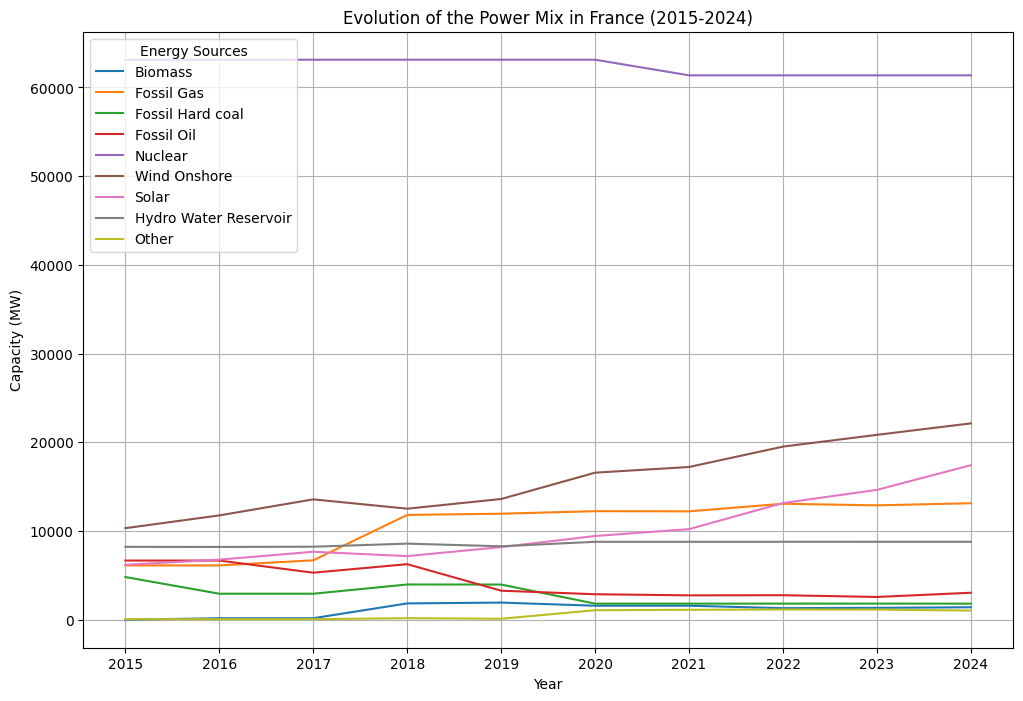

In [87]:
plt.figure(figsize=(12, 8))
energy_sources = ['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Nuclear', 'Wind Onshore', 'Solar', 'Hydro Water Reservoir','Other']

for source in energy_sources:

    plt.plot(df1['Year'], pd.to_numeric(df1[source], errors='coerce'), label=source)

plt.title('Evolution of the Power Mix in France (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.legend(title="Energy Sources", loc='upper left')
plt.grid(True)
plt.show()



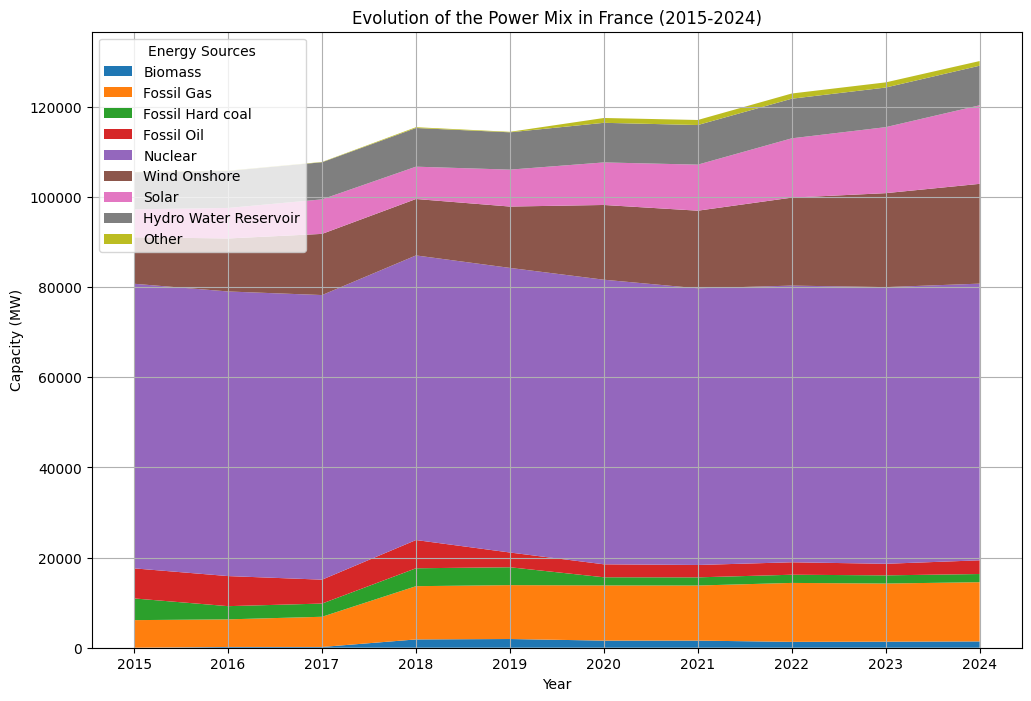

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 8))
energy_sources = ['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Nuclear', 'Wind Onshore', 'Solar', 'Hydro Water Reservoir','Other']

stack_data = [pd.to_numeric(df1[source], errors='coerce').values for source in energy_sources]

plt.stackplot(df1['Year'], stack_data, labels=energy_sources)

plt.title('Evolution of the Power Mix in France (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.legend(title="Energy Sources", loc='upper left')
plt.grid(True)
plt.show()

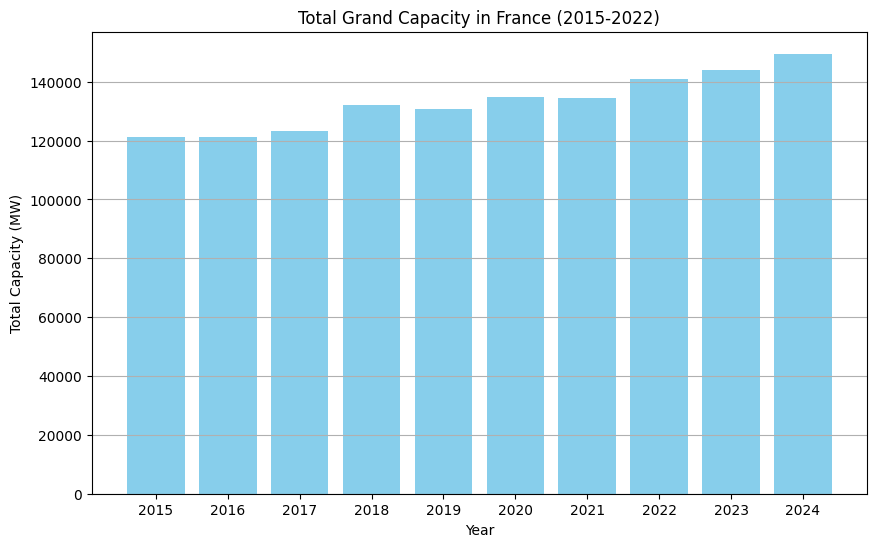

In [81]:
plt.figure(figsize=(10, 6))
plt.bar(df1['Year'], df1['Total Grand capacity'], color='skyblue')
plt.title('Total Grand Capacity in France (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Total Capacity (MW)')
plt.grid(axis='y')
plt.show()


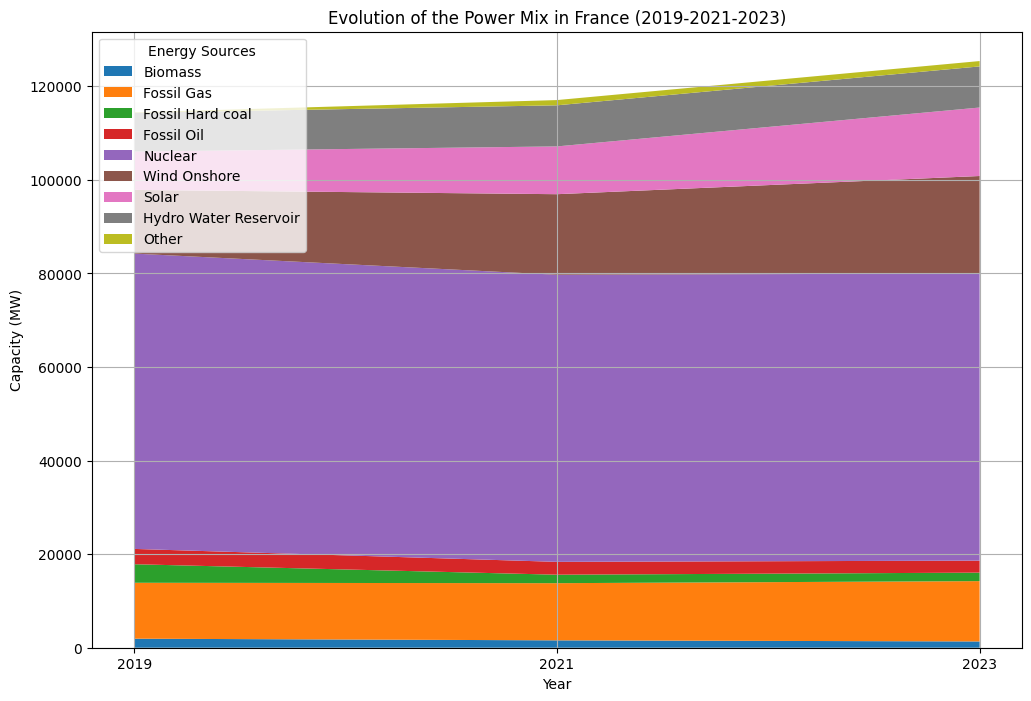

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 8))
energy_sources = ['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Nuclear', 'Wind Onshore', 'Solar', 'Hydro Water Reservoir','Other']
df2 = df1[df1['Year'].isin(['2019', '2021', '2023'])]

stack_data = [pd.to_numeric(df2[source], errors='coerce').values for source in energy_sources]

plt.stackplot(df2['Year'], stack_data, labels=energy_sources)

plt.title('Evolution of the Power Mix in France (2019-2021-2023)')
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.legend(title="Energy Sources", loc='upper left')
plt.grid(True)
plt.show()

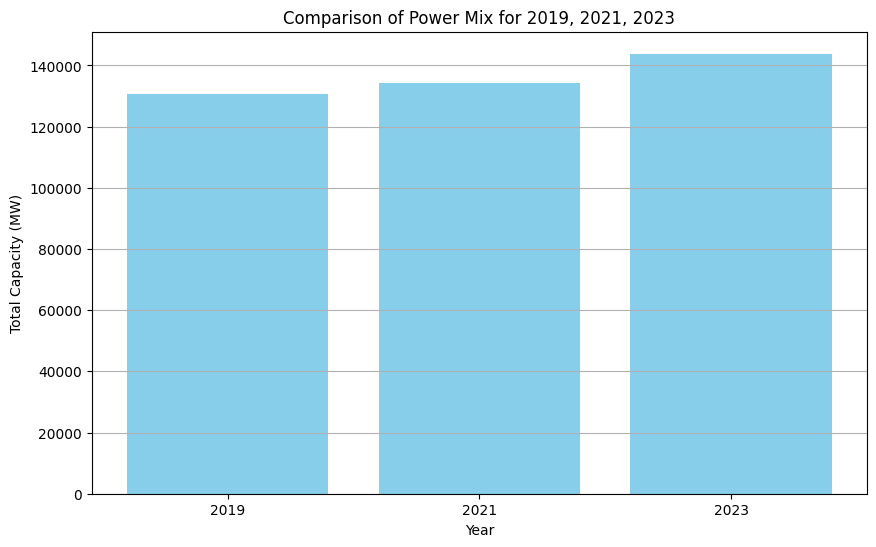

In [89]:
plt.figure(figsize=(10, 6))
plt.bar(df2['Year'], df2['Total Grand capacity'], color='skyblue')
plt.title('Comparison of Power Mix for 2019, 2021, 2023')
plt.xlabel('Year')
plt.ylabel('Total Capacity (MW)')
plt.grid(axis='y')
plt.show()


From 2019 to 2021, France's energy capacity grew by 3,687 MW, showing steady development. Between 2021 and 2023, a larger increase of 15,151 MW suggests stronger investments in others energy.